In [16]:
import pandas as pd
import torch
import sys
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.utils.data import random_split


sys.path.append("../")
from src.architectures.lstm.classifier import LSTMClassifier
from src.architectures.lstm.autoencoder import LSTMAutoEncoder
from src.dataset import ExerciseDataset
from src.trainer import Trainer

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = torch.manual_seed(0)

## Joints

### Data

In [3]:
squat_joints_df = pd.read_csv("../data/joints/squat.csv")
squat_joints_df.head()

,rep,frame,x,y,z,label
0,1,0,0.005017,0.068533,0.257256,correct
1,1,0,0.007799,0.000000,0.195177,correct
2,1,0,-0.052837,0.001294,0.195874,correct
3,1,0,-0.071019,-0.016791,0.096348,correct
4,1,0,-0.067215,-0.001036,0.000939,correct


In [4]:
squat_joints_dataset = ExerciseDataset(squat_joints_df, representation="joints")
dataset_length = len(squat_joints_dataset)

In [5]:
train_joints_squat_dataset, val_joints_squat_dataset = random_split(
    squat_joints_dataset,
    [int(0.95 * dataset_length), dataset_length - int(0.95 * dataset_length)],
    generator,
)

In [6]:
batch_size = 16

train_squat_joints_dl = DataLoader(
    train_joints_squat_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=ExerciseDataset.pad_batch,
)

val_squat_joints_dl = DataLoader(
    val_joints_squat_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=ExerciseDataset.pad_batch,
)

### Parameters 

In [17]:
NUM_JOINTS = 25
NUM_ANGLES = 6

LATENT_DIM = 64
SPACE_DIM = 3
NUM_CLASSES = 5
NUM_LAYERS = 4
HIDDEN_SIZE = 128

### Model

In [8]:
joints_lstm = LSTMClassifier(NUM_JOINTS * SPACE_DIM, HIDDEN_SIZE, NUM_LAYERS, NUM_CLASSES)
loss_fn = torch.nn.CrossEntropyLoss()
lr = 0.0001
optimizer = torch.optim.Adam(joints_lstm.parameters(), lr)

### Training

In [9]:
trainer = Trainer(
    joints_lstm, train_squat_joints_dl, val_squat_joints_dl, loss_fn, optimizer, device
)
results = trainer.train_classifier(num_epochs=250)

 50%|█████     | 4/8 [00:01<00:01,  3.76it/s]


KeyboardInterrupt: 

In [ ]:
plt.plot([result["train_loss"] for result in results], label="train acc")

NameError: name 'results' is not defined

Output values looks very uninteresting, that's probably because of how many features (75) were used as input and how many samples are in dataset (132).

## Angles

In [10]:
squat_angles_df = pd.read_csv("../data/angles/squat.csv")
squat_angles_df.head()

,rep,frame,left_knee,right_knee,right_arm,left_arm,left_hip,right_hip,label
0,1,0,167.455608,172.221420,156.794372,161.891089,175.869505,174.656520,correct
1,1,1,165.422781,170.596107,153.645161,160.043919,174.906872,175.458800,correct
2,1,2,162.825017,168.208123,149.462242,157.478636,172.839533,175.276172,correct
3,1,3,159.607962,165.029685,145.308846,154.201990,169.860558,173.482732,correct
4,1,4,155.860505,161.165659,141.762281,149.942374,166.194988,170.643770,correct


In [11]:
squat_angles_dataset = ExerciseDataset(squat_angles_df, representation="angles")

In [12]:
train_squat_angles_dataset, val_squat_angles_dataset = random_split(
    squat_angles_dataset,
    [int(0.95 * dataset_length), dataset_length - int(0.95 * dataset_length)],
    generator,
)

In [13]:
batch_size = 16

train_squat_angles_dl = DataLoader(
    train_squat_angles_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=ExerciseDataset.pad_batch,
)

val_squat_angles_dl = DataLoader(
    val_squat_angles_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=ExerciseDataset.pad_batch,
)

In [14]:
angles_lstm = LSTMClassifier(NUM_ANGLES, HIDDEN_SIZE, NUM_LAYERS, NUM_CLASSES)
loss_fn = torch.nn.CrossEntropyLoss()
lr = 0.0001
optimizer = torch.optim.Adam(angles_lstm.parameters(), lr)

In [ ]:
trainer = Trainer(
    angles_lstm, train_squat_angles_dl, val_squat_angles_dl, loss_fn, optimizer, device
)
results = trainer.train(num_epochs=250, weights_path="../models/angles_lstm.pt")

 88%|████████▊ | 7/8 [00:01<00:00,  4.73it/s]


KeyboardInterrupt: 

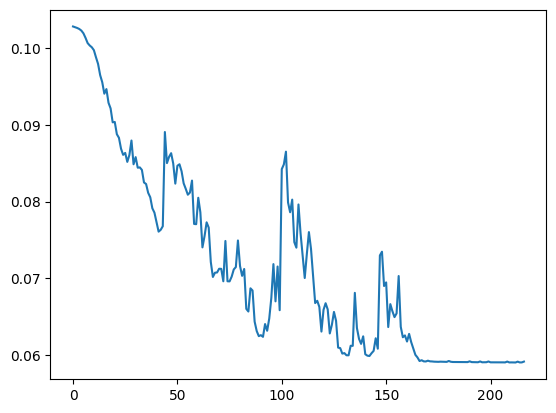

In [ ]:
plt.plot([result["train_loss"] for result in results], label="train loss")